Load Dataset

In [5]:
import pandas as pd
df = pd.read_csv("../data/processed/annotations.csv")
print(df.head())

                 image        xmin        ymin        xmax        ymax  \
0  maksssksksss702.png    6.000000  223.000008   41.000001  300.000004   
1  maksssksksss702.png  114.000001  118.000004  140.000001  161.999998   
2  maksssksksss702.png  121.000003  229.000006  169.000000  341.000011   
3  maksssksksss702.png  210.000008  166.000001  249.000008  250.000011   
4  maksssksksss702.png  235.000004   86.000000  263.000011  144.999995   

             class_label  
0              with_mask  
1              with_mask  
2              with_mask  
3              with_mask  
4  mask_weared_incorrect  


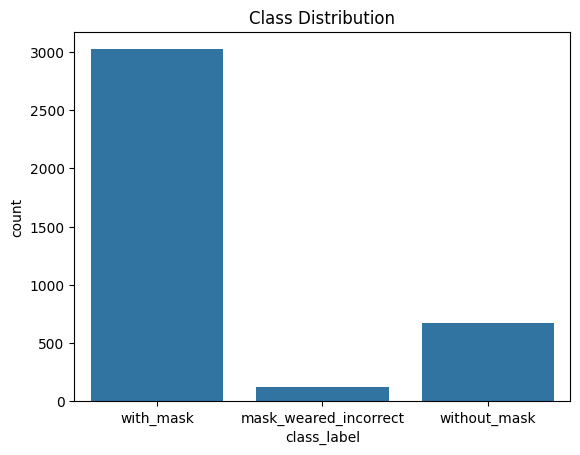

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="class_label", data=df)
plt.title("Class Distribution")
plt.show()

Number of objects per image

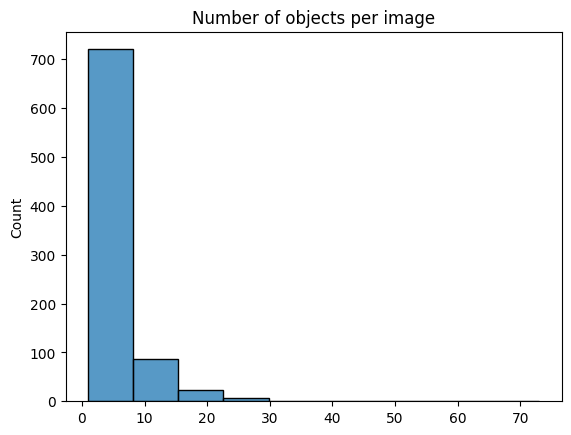

In [6]:
obj_per_image = df.groupby("image").size()
sns.histplot(obj_per_image, bins=10)
plt.title("Number of objects per image")
plt.show()

Bounding box statistics

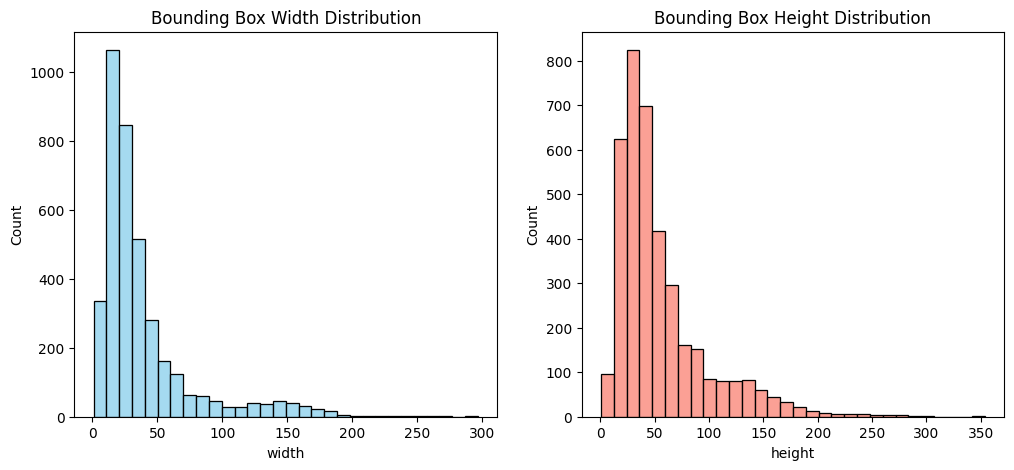

In [7]:
df['width'] = df['xmax'] - df['xmin']
df['height'] = df['ymax'] - df['ymin']

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['width'], bins=30, color='skyblue')
plt.title("Bounding Box Width Distribution")

plt.subplot(1,2,2)
sns.histplot(df['height'], bins=30, color='salmon')
plt.title("Bounding Box Height Distribution")
plt.show()

Visualizing bounding boxes

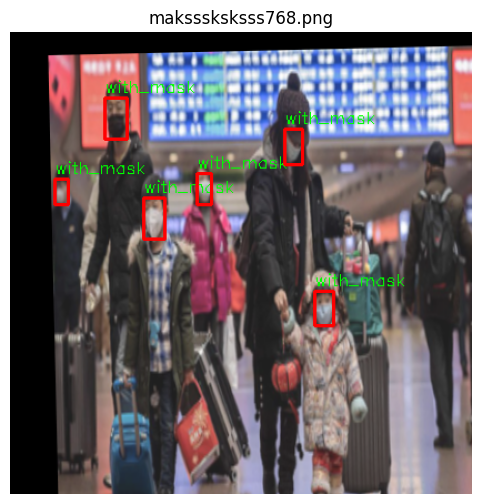

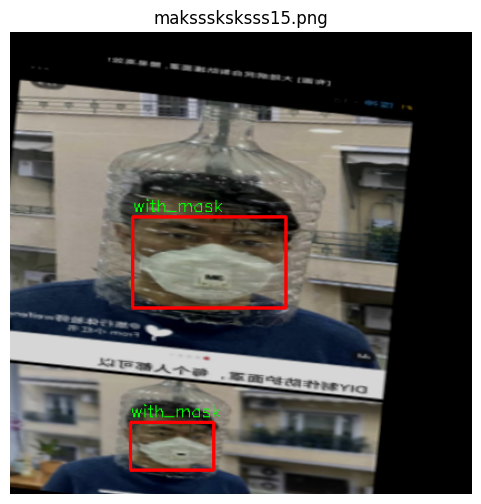

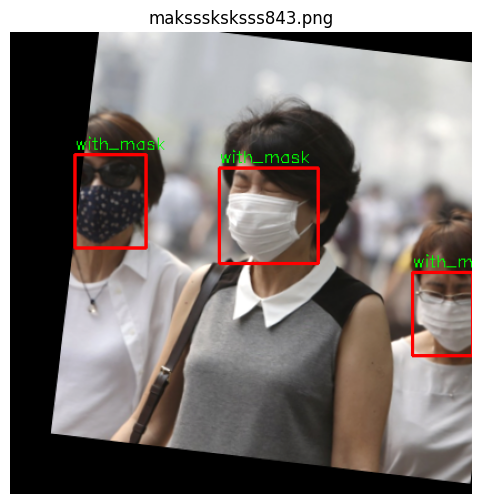

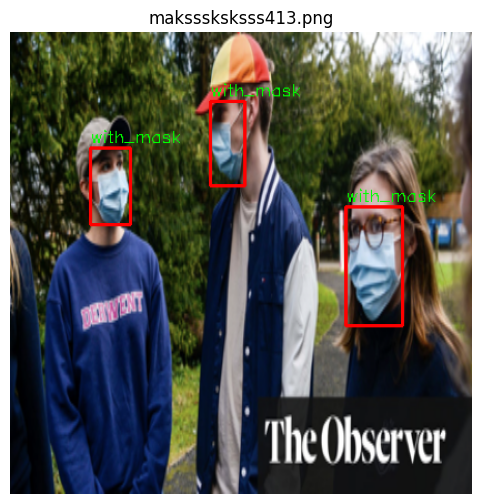

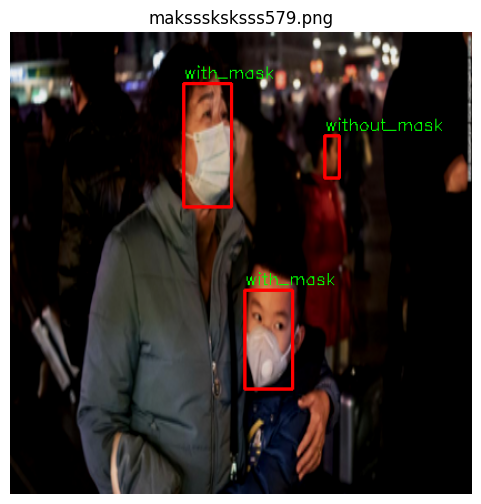

In [12]:
# Step 5: Visual inspection of images with bounding boxes

import cv2
import matplotlib.pyplot as plt
import random
from pathlib import Path

# Resolve project root and image directory safely
PROJECT_ROOT = Path.cwd().parent          # notebooks → project root
IMAGE_DIR = PROJECT_ROOT / "data" / "processed" / "images"

# Randomly sample 5 images from the dataset
sample_images = random.sample(list(df['image'].unique()), 5)

for img_file in sample_images:
    img_path = IMAGE_DIR / img_file
    img = cv2.imread(str(img_path))

    # Safety check in case image is missing
    if img is None:
        print(f"⚠️ Image not found or could not be loaded: {img_path}")
        continue

    # Convert BGR (OpenCV default) to RGB for matplotlib
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Get all bounding boxes for this image
    boxes = df[df['image'] == img_file]

    for _, row in boxes.iterrows():
        cv2.rectangle(
            img,
            (int(row['xmin']), int(row['ymin'])),
            (int(row['xmax']), int(row['ymax'])),
            (255, 0, 0),
            2
        )
        cv2.putText(
            img,
            row['class_label'],
            (int(row['xmin']), int(row['ymin']) - 5),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 255, 0),
            1
        )

    # Display image
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(img_file)
    plt.axis("off")
    plt.show()
